Imports

In [1]:
#Import all of the necessary packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.html.widgets import interact, fixed
import ipywidgets as widgets
import io

font_plt = {'family': 'serif',
            'color':  'darkred',
            'weight': 'normal',
            'size': 10,
            }
font_plt_ax = {'family': 'serif',
               'color':  'black',
               'weight': 'normal',
               
               'size': 10,
              }
import sys
sys.path.append("../.")
import glob #glob is helpful for searching for filenames or directories
import ddm_clean as ddm #this is the module containing the differential dynamic microscopy code
import scipy #scientific python
from scipy.signal import blackmanharris as bh #for Blackman-Harris windowing
import pickle #for saving data
from scipy.special import gamma
import mpld3

C:\Users\Student\Anaconda2\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
../.\tiff_file.py:1995: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
../.\tiff_file.py:1995: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
../.\tiff_file.py:1995: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)


Pick Which Videos and ROIs You Want

In [2]:
##Video 1
data_dir1 = "Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Actin\\2018_07_17\\40\\Actin40fps_3\\"
datafile ="AllResultsActin40fps717_3.p"

frame_rate = 40.0
f = open(data_dir1+datafile,'rb')
AllResults = pickle.load(f)
f.close()
imDimension = 128
px = .196


# data_dir2 = "Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Copolymerized\\2018_07_17\\40\\copoly40fps_2\\"
# datafile2 ="AllResultsCopoly40fps_2.p"

# frame_rate2 = 40.0
# g = open(data_dir2+datafile2,'rb')
# AllResults2 = pickle.load(g)
# g.close()


# ##Video 2
# data_dir2 = "Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Dilute\\2018_07_05\\40\\2018_07_05_Dilute40fps2_1\\"
# ##Video 3
# data_dir3 = "Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Dilute\\2018_07_05\\40\\2018_07_05_Dilute40fps2_1\\"


Saving all at once

In [ ]:
Sample0={}

In [ ]:
## You dont have to edit anything here unless it can't find the fft files then change the ddmdatafile
if(imDimension == 256):
    ROIs = ['0','256','512']   ##for a 256
    dim='_256x256_'
elif(imDimension==128):
    ROIs = ['0','128','256','384','512','640'] ##for a 128
    dim='_128x128_'
for i in range(len(ROIs)):
    ROI = ROIs[i]
    
    fitparamsA = AllResults['fitparams'+str(ROI)]
    theoryA = AllResults['theory'+str(ROI)]
    chiA = AllResults['chi2'+str(ROI)]
    
    ##File Name of the fft files
    ddmdatafile = data_dir1.split("\\")[-2]+'_MMStack_Pos0.ome_'+str(ROI)+dim+'FFTDIFFS_dts_ravs.p'
    
    g = open(data_dir1+ddmdatafile,'rb')
    dat = pickle.load(g)
    g.close()
    
    Sample0['dts'+ROIs[i]]  = dat['dts']
    Sample0['ravs'+ROIs[i]] = dat['ravs']
    Sample0['ffts'+ROIs[i]] = dat['ffts']
    Sample0['times'+ROIs[i]]= dat['dts']/frame_rate

In [ ]:
pickle.dump(Sample0, open(data_dir1+ '\\RavsForFits.p', 'wb'))

In [3]:
a = open(data_dir1+'\\RavsForFits.p','rb')
Sample0 = pickle.load(a)
a.close()

In [4]:
q_index = 20

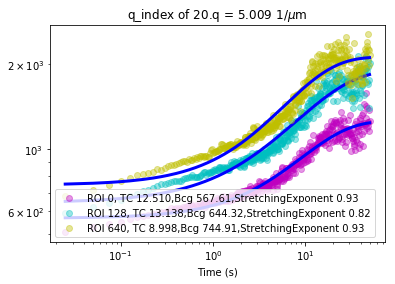

In [5]:
%matplotlib inline
ROIs = [0,128,640]
col = ['mo','co','yo','mo','co','yo']

imDimension= 128
px = .196
q = np.arange(0,imDimension/2)*2*np.pi*(1./(imDimension*px))
for i in range(len(ROIs)):
    ROI = ROIs[i]
    fitparamsB = AllResults['fitparams'+str(ROI)]
    theoryB = AllResults['theory'+str(ROI)]
    chiB = AllResults['chi2'+str(ROI)]
    
    times = Sample0['times'+str(ROIs[i])]
    ravs= Sample0['ravs'+str(ROIs[i])]
  
    
    plt.loglog(times,ravs[:,q_index],col[i],alpha=0.4, label = 'ROI %i, TC %.3f,Bcg %.2f,StretchingExponent %.2f'
               %(ROIs[i], fitparamsB[q_index][1], fitparamsB[q_index][2] ,fitparamsB[q_index][3] ))
    plt.loglog(times[:len(theoryB[q_index,:])], theoryB[q_index,:], '-b',lw=3)
plt.title('q_index of %i.q = %.3f 1/$\mu$m' %(q_index, q[q_index]))
plt.xlabel("Time (s)")
plt.legend()


    

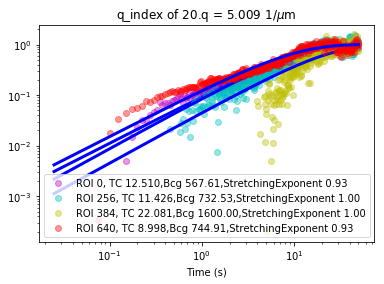

In [9]:
##scaled for better comparison
if(imDimension == 256):
    ROIs = [0,256,512]   ##for a 256
elif(imDimension==128):
    ROIs = [0,256,384,640] ##for a 128
col = ['mo','co','yo','ro','bo','ko']
px = .196
q = np.arange(0,imDimension/2)*2*np.pi*(1./(imDimension*px))

for i in range(len(ROIs)):
    ROI = ROIs[i]
    fitparamsA = AllResults['fitparams'+str(ROI)]
    theoryA = AllResults['theory'+str(ROI)]
    chiA = AllResults['chi2'+str(ROI)]
    
    times = Sample0['times'+str(ROIs[i])]
    ravs= Sample0['ravs'+str(ROIs[i])]
    adjustedravs = (ravs[:,q_index]-fitparamsA[q_index][2])/fitparamsA[q_index][0]
    adjustedtheoryA = (theoryA-fitparamsA[q_index][2])/fitparamsA[q_index][0]
    
    plt.loglog(times,adjustedravs,col[i],alpha=0.4, label = 'ROI %i, TC %.3f,Bcg %.2f,StretchingExponent %.2f'
               %(ROIs[i], fitparamsA[q_index][1], fitparamsA[q_index][2] ,fitparamsA[q_index][3] ))
    
    plt.loglog(times[:len(adjustedtheoryA[q_index,:])], adjustedtheoryA[q_index,:], '-b',lw=3)
plt.title('q_index of %i.q = %.3f 1/$\mu$m' %(q_index, q[q_index]))
plt.xlabel("Time (s)")
plt.legend()



In [14]:
for i in range(0,63):
    print AllResults['fitparams512'][i][0]

0.0
2273532592.0478706
110946.25751947369
48505.08993102565
45201.19663724462
63824.532829485215
56221.048388981406
102139.92563827478
71129.04837579872
45736.98133792344
27053.908324779215
21112.122626318327
17783.137933404414
13627.476466777034
8749.540453087811
3844.8001378161243
2403.292230737073
1831.0413074619491
1402.850514309067
1319.714186070181
1049.4584385664878
634.9498254454966
367.30920470694315
8.300863617544306e-07
395.3405347687151
142.73566634269446
0.00278849133456809
0.0
2.842170943040401e-14
1.4210854715202004e-14
0.0
0.0
13.307660010529998
4.170405543712892
6.843032785765963
2.601498138614096
12.37740368333382
0.0
0.0
5.2319846052534
4.129073224549267
4.482176158660445
262.06233998729823
16.867513401057117
16.70833673564463
2.657777873284629
16.077455554635996
0.0
16.05628356346714
0.0
2.107151607457547
51.87220037317756
10.447772984258192
6.198112315539781
1.6838620984082215
0.0
158.58997941963278
76.75472168503902
0.0
0.0
0.0
7.571177639721712
0.0


In [19]:
for i in range(0,63):
    if (AllResults['fitparams256'][i][0]== 0.0 and i>0):
        print i

41
42
43
44
47
48
49
52
58


(array([0], dtype=int64),)

(array([0], dtype=int64),)